In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
credit_risk = pd.read_csv('/content/drive/MyDrive/IC/Datasets/german_credit_data.csv')

In [ ]:
credit_risk.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df = credit_risk.iloc[:,1:]

In [ ]:
df.columns[1:]

Index(['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
df['Sex'][0]

'male'

Algumas características do dataset:


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.nunique(axis = 0)

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [ ]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [ ]:
df.Purpose.unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [ ]:
df.Job.unique() #Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

array([2, 1, 3, 0])

In [ ]:
df.Housing.unique()

array(['own', 'free', 'rent'], dtype=object)

In [ ]:
df.iloc[:,4].unique() #Saving accounts

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

Verificando a presença de dados faltantes


In [ ]:
df[df.isnull().any(axis=1)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
2,49,male,1,own,little,NaN,2096,12,education,good
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
...,...,...,...,...,...,...,...,...,...,...
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good


In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [ ]:
df_saving_checking = df[df['Checking account'] == df['Saving accounts']]

In [ ]:
df_saving_checking.shape

(269, 10)

In [ ]:
df_saving_checking.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df.iloc[:,4].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
df.iloc[:,5].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
df_little = df[df['Saving accounts'] == 'little']
df_little[df_little['Checking account'] == 'little'].shape

(219, 10)

In [ ]:
df_rich = df[df['Saving accounts'] == 'rich']
df_rich[df_rich['Checking account'] == 'little'].shape

(6, 10)

In [ ]:
df[df['Saving accounts'].isnull() & df['Checking account'].isnull()].shape 
#Existem 99 linhas tais que 'Saving accounts' e 'Checking accounts estão faltando'.

(99, 10)

Substituir little: 0, moderate: 1, rich: 2, quite rich: 3

In [ ]:
df_numerico = df.replace(to_replace = {'Saving accounts': {'little': 0, 'moderate': 1, 'rich': 2, 'quite rich':3}, 'Checking account':{'little': 0, 'moderate': 1, 'rich':2}, 'Risk':{'bad': 0, 'good': 1 }})
df_numerico


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,0.0,1169,6,radio/TV,1
1,22,female,2,own,0.0,1.0,5951,48,radio/TV,0
2,49,male,1,own,0.0,NaN,2096,12,education,1
3,45,male,2,free,0.0,0.0,7882,42,furniture/equipment,1
4,53,male,2,free,0.0,0.0,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,0.0,NaN,1736,12,furniture/equipment,1
996,40,male,3,own,0.0,0.0,3857,30,car,1
997,38,male,2,own,0.0,NaN,804,12,radio/TV,1
998,23,male,2,free,0.0,0.0,1845,45,radio/TV,0


In [ ]:
df_good = df_numerico[df_numerico['Risk'] == 1]
df_good_400 = df_numerico.iloc[0:400, :]
len(df_good_400)

400

In [ ]:
df_bad = df_numerico[df_numerico['Risk'] == 0]

In [ ]:
df_num = pd.concat([df_good_400, df_bad], axis = 0)

In [ ]:
df_num

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,0.0,1169,6,radio/TV,1
1,22,female,2,own,0.0,1.0,5951,48,radio/TV,0
2,49,male,1,own,0.0,NaN,2096,12,education,1
3,45,male,2,free,0.0,0.0,7882,42,furniture/equipment,1
4,53,male,2,free,0.0,0.0,4870,24,car,0
...,...,...,...,...,...,...,...,...,...,...
979,25,male,2,rent,1.0,1.0,1264,15,car,0
980,49,male,2,own,0.0,1.0,8386,30,furniture/equipment,0
981,33,male,3,rent,0.0,NaN,4844,48,business,0
983,26,male,2,own,0.0,0.0,8229,36,car,0


In [ ]:
valores = {'Saving accounts': int(np.mean(df_numerico['Saving accounts'])), 'Checking account': int(np.mean(df_numerico['Checking account'])), }
df_cleaned = df_num.fillna(value = valores)

In [ ]:
df_cleaned.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [ ]:
df_cleaned[df_cleaned['Saving accounts'] == 0].shape

(558, 10)

In [ ]:
df_cleaned.shape

(700, 10)

In [ ]:
df_cleaned.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,0.0,0.0,1169,6,radio/TV,1
1,22,female,2,own,0.0,1.0,5951,48,radio/TV,0
2,49,male,1,own,0.0,0.0,2096,12,education,1
3,45,male,2,free,0.0,0.0,7882,42,furniture/equipment,1
4,53,male,2,free,0.0,0.0,4870,24,car,0


Estudando a relação entre as variáveis:


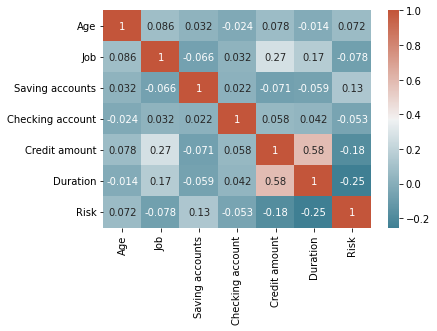

In [ ]:
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True))

Plotando o histograma das variáveis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc6451d5950>,
      dtype=object)

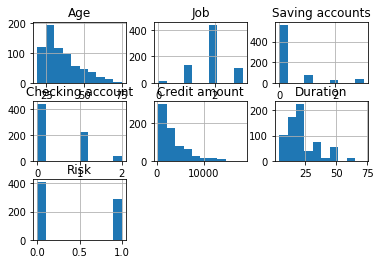

In [ ]:
df_cleaned.hist()

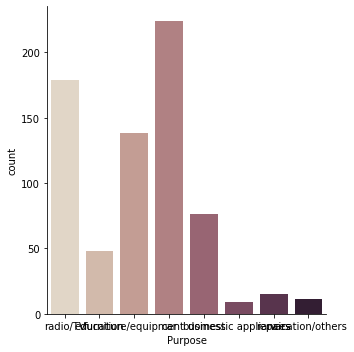

In [ ]:
sns.catplot(x = 'Purpose', kind = 'count', palette="ch:.25", data = df_cleaned)


In [ ]:
#sns.pairplot(df_cleaned)

Iremos utilizar a função One Hot Enconding para as colunas 'Sex', 'Housing', 'Purpose'.

In [ ]:
X = df_cleaned.drop('Risk', axis = 'columns')
y = df_cleaned.Risk

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
columns_trans = make_column_transformer(
    (OneHotEncoder(), ['Sex', 'Housing', 'Purpose']), 
    remainder = 'passthrough'
)

In [ ]:
columns_trans.fit_transform(X).shape

(700, 19)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

In [ ]:
pipe = make_pipeline(columns_trans, MinMaxScaler())

In [ ]:
X_prepared = pipe.fit_transform(X)

Dividindo em conjunto de treino e teste:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared,y, test_size = 0.3, random_state = 99)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 99)

In [ ]:
X_train.shape

(490, 19)

In [ ]:
X_test.shape

(105, 19)

In [ ]:
df_cleaned.shape

(700, 10)

In [ ]:
#Proporções - Conjunto de treino
len(y_train[y_train == 1])/len(y_train)

0.42448979591836733

In [ ]:
#Conjunto de validação
len(y_val[y_val == 1])/len(y_val)

0.41904761904761906

In [ ]:
#Conjunto de teste
len(y_test[y_test == 1])/len(y_test)

0.38095238095238093

MODELOS: Irei testar ANN, SVM

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [19,1]))
model.add(tf.keras.layers.Dense(16, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(loss= 'binary_crossentropy', optimizer= tf.keras.optimizers.Adam(learning_rate=0.001), metrics= ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 19)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                320       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_history = model.fit(X_train, y_train, epochs = 100, validation_data= (X_val, y_val))

Epoch 1/100
16/16 [==============================] - 2s 55ms/step - loss: 1.3354 - accuracy: 0.4571 - val_loss: 1.3101 - val_accuracy: 0.4190
Epoch 2/100
16/16 [==============================] - 0s 8ms/step - loss: 1.2839 - accuracy: 0.4898 - val_loss: 1.2603 - val_accuracy: 0.4667
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 1.2365 - accuracy: 0.5265 - val_loss: 1.2167 - val_accuracy: 0.4857
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1.1939 - accuracy: 0.5612 - val_loss: 1.1756 - val_accuracy: 0.5333
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.1543 - accuracy: 0.5612 - val_loss: 1.1363 - val_accuracy: 0.5333
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 1.1159 - accuracy: 0.5837 - val_loss: 1.0999 - val_accuracy: 0.5905
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 1.0805 - accuracy: 0.5878 - val_loss: 1.0646 - val_accuracy: 0.6095
Epoch 8/100


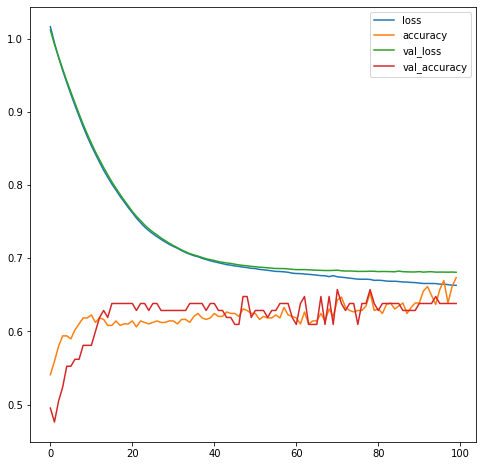

In [ ]:
pd.DataFrame(model_history.history).plot(figsize = (8,8))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.6381


In [ ]:
y_pred_ann = (model.predict(X_test) > 0.5).astype('int32')

In [ ]:
conf_matrix_ann = pd.DataFrame(confusion_matrix(y_test, y_pred_ann)).rename(index = {0:'negativo', 1:'positivo'}, columns = {0:'negativo', 1: 'positivo'})
vn, fp, fn, vp = confusion_matrix(y_test, y_pred_ann).ravel()
conf_matrix_ann

,negativo,positivo
negativo,55,10
positivo,28,12


In [ ]:
especificidade = vn/(fp + vn)
especificidade

0.8461538461538461

In [ ]:
sensibilidade = vp/(vp + fn)
sensibilidade

0.3

Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
linear_svm_clf = LinearSVC(C=1, loss='hinge')
linear_svm_clf.fit(X_train, y_train)

LinearSVC(C=1, loss='hinge')

In [ ]:
y_pred = linear_svm_clf.predict(X_test)
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).rename(index = {0:'negativo', 1:'positivo'}, columns = {0:'negativo', 1: 'positivo'})
conf_matrix

,negativo,positivo
negativo,45,20
positivo,23,17


In [ ]:
score = linear_svm_clf.score(X_test, y_test)
score

0.5904761904761905

In [ ]:
svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)
svm_clf.fit(X_train, y_train)

SVC(C=5, coef0=1, kernel='poly')

In [ ]:
y_pred_kernel = svm_clf.predict(X_test)
conf_matrix_kernel = pd.DataFrame(confusion_matrix(y_test, y_pred_kernel)).rename(index = {0:'negativo', 1:'positivo'}, columns = {0:'negativo', 1: 'positivo'})
conf_matrix_kernel

,negativo,positivo
negativo,48,17
positivo,19,21


In [ ]:
score_kernel = svm_clf.score(X_test, y_test)
score_kernel

0.6571428571428571

In [ ]:
vn_k, fp_k, fn_k, vp_k = confusion_matrix(y_test, y_pred_kernel).ravel()

In [ ]:
especificidade_k = vn_k/(vn_k + fp_k)
especificidade_k

0.7384615384615385

In [ ]:
sensibilidade_k = vp_k/(vp_k + fn_k)
sensibilidade_k

0.525